# HistGradientBoostingRegressor
## Target Variable: penetrance_lqt2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence

c:\python38\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('csv_data/new_herg_combined_data.csv')

In [4]:
list(data)

['Unnamed: 0.1',
 'Unnamed: 0',
 'var',
 'isoform',
 'mut_type',
 'resnum',
 'lqt2',
 'unaff',
 'total_carriers',
 'gnomAD',
 'gnomAD_seq',
 'weight',
 'penetrance_lqt2',
 'lqt2_penetranceBayesian_initial',
 'lqt2_penetranceBayesian',
 'pph2_prob',
 'blast_pssm',
 'provean_score',
 'pamscore',
 'aasimilaritymat',
 'revel_score',
 'hm_ssPeak',
 'hm_tailPeak',
 'hm_vhalfact',
 'hm_vhalfinact',
 'hm_recovfrominact',
 'hm_taudeact_fast',
 'ht_ssPeak',
 'ht_tailPeak',
 'ht_vhalfact',
 'ht_vhalfinact',
 'ht_recovfrominact',
 'ht_taudeact_fast',
 'lqt2_dist',
 'lqt2_dist_weight',
 'Structure',
 'Function',
 'p_mean_w',
 'prior_mean_w',
 'prior_mean',
 'alpha',
 'beta',
 'lqt2_patho',
 'p_mean_prior',
 'RMSF',
 'lqt2_dist_sequence',
 'lqt2_dist_weight_sequence',
 'lqt2_dist_observed',
 'lqt2_dist_weight_observed',
 'lqt2_dist_max',
 'lqt2_dist_weight_max',
 'lqt2_dist_mean',
 'lqt2_dist_weight_mean',
 'lqt2_dist_obs_max',
 'lqt2_dist_weight_obs_max',
 'lqt2_dist_obs_mean',
 'lqt2_dist_weight_o

#### MSE: mean squared error
#### RMSE: root-mean-square deviation
#### MAE: mean absolute error

In [5]:
filter_columns = ['penetrance_lqt2','RMSF','lqt2_dist_sequence','lqt2_dist_weight_sequence',
                  'lqt2_dist_observed','lqt2_dist_weight_observed', 'lqt2_dist_max', 
                  'lqt2_dist_weight_max','lqt2_dist_mean','lqt2_dist_weight_mean',
                  'lqt2_dist_obs_max','lqt2_dist_weight_obs_max','lqt2_dist_obs_mean',
                  'lqt2_dist_weight_obs_mean','lqt2_dist_obs_seq','lqt2_dist_weight_obs_seq', 
                  'revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight',
                  'lqt2','unaff','total_carriers','gnomAD','gnomAD_seq','weight','pph2_prob',
                  'blast_pssm','provean_score','pamscore','aasimilaritymat','hm_ssPeak',
                  'hm_vhalfact','hm_vhalfinact','hm_recovfrominact','hm_taudeact_fast',
                  'ht_ssPeak','ht_vhalfact','ht_vhalfinact','ht_recovfrominact',
                  'ht_taudeact_fast','prior_mean_w', 'prior_mean','alpha','beta','lqt2_patho',
                  'p_mean_prior']

df = data.filter(filter_columns, axis=1)

In [6]:
features = ['RMSF','lqt2_dist_sequence','lqt2_dist_weight_sequence',
                  'lqt2_dist_observed','lqt2_dist_weight_observed', 'lqt2_dist_max', 
                  'lqt2_dist_weight_max','lqt2_dist_mean','lqt2_dist_weight_mean',
                  'lqt2_dist_obs_max','lqt2_dist_weight_obs_max','lqt2_dist_obs_mean',
                  'lqt2_dist_weight_obs_mean','lqt2_dist_obs_seq','lqt2_dist_weight_obs_seq']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

In [7]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.13
RMSE: 0.36
MAE: 0.28
R-squared: 0.29
Explained variance score: 0.29


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
features = ['RMSF','lqt2_dist_sequence','lqt2_dist_weight_sequence',
                  'lqt2_dist_observed','lqt2_dist_weight_observed', 'lqt2_dist_max', 
                  'lqt2_dist_weight_max','lqt2_dist_mean','lqt2_dist_weight_mean',
                  'lqt2_dist_obs_max','lqt2_dist_weight_obs_max','lqt2_dist_obs_mean',
                  'lqt2_dist_weight_obs_mean','lqt2_dist_obs_seq','lqt2_dist_weight_obs_seq',
                  'revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

In [9]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.08
RMSE: 0.28
MAE: 0.22
R-squared: 0.56
Explained variance score: 0.57


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
features = ['RMSF','lqt2_dist_sequence','lqt2_dist_weight_sequence',
                  'lqt2_dist_observed','lqt2_dist_weight_observed', 'lqt2_dist_max', 
                  'lqt2_dist_weight_max','lqt2_dist_mean','lqt2_dist_weight_mean',
                  'lqt2_dist_obs_max','lqt2_dist_weight_obs_max','lqt2_dist_obs_mean',
                  'lqt2_dist_weight_obs_mean','lqt2_dist_obs_seq','lqt2_dist_weight_obs_seq', 
                  'revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight',
                  'lqt2','unaff','total_carriers','gnomAD','gnomAD_seq','weight','pph2_prob',
                  'blast_pssm','provean_score','pamscore','aasimilaritymat','hm_ssPeak',
                  'hm_vhalfact','hm_vhalfinact','hm_recovfrominact','hm_taudeact_fast',
                  'ht_ssPeak','ht_vhalfact','ht_vhalfinact','ht_recovfrominact',
                  'ht_taudeact_fast','prior_mean_w', 'prior_mean','alpha','beta','lqt2_patho',
                  'p_mean_prior']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

In [11]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.00
RMSE: 0.05
MAE: 0.03
R-squared: 0.99
Explained variance score: 0.99


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
features = ['RMSF','lqt2_dist_sequence','lqt2_dist_weight_sequence',
                  'lqt2_dist_observed','lqt2_dist_weight_observed', 'lqt2_dist_max', 
                  'lqt2_dist_weight_max','lqt2_dist_mean','lqt2_dist_weight_mean',
                  'lqt2_dist_obs_max','lqt2_dist_weight_obs_max','lqt2_dist_obs_mean',
                  'lqt2_dist_weight_obs_mean','lqt2_dist_obs_seq','lqt2_dist_weight_obs_seq', 
                  'revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight',
                  'lqt2','unaff','total_carriers','gnomAD','gnomAD_seq','weight','pph2_prob',
                  'blast_pssm','provean_score','pamscore','aasimilaritymat','hm_ssPeak',
                  'hm_vhalfact','hm_vhalfinact','hm_recovfrominact','hm_taudeact_fast',
                  'ht_ssPeak','ht_vhalfact','ht_vhalfinact','ht_recovfrominact',
                  'ht_taudeact_fast','prior_mean_w', 'prior_mean','alpha','beta','lqt2_patho',
                  'p_mean_prior']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

In [13]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.00
RMSE: 0.05
MAE: 0.03
R-squared: 0.99
Explained variance score: 0.99


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
features = ['revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


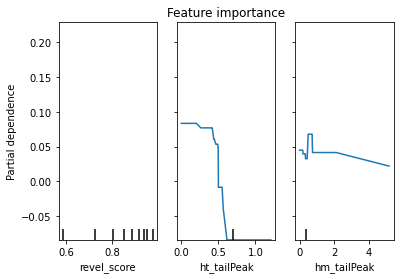

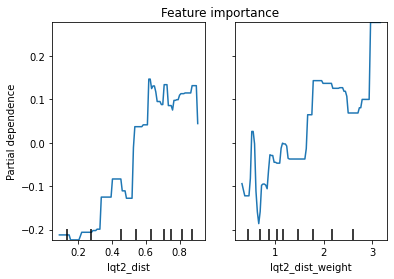

MSE: 0.08
RMSE: 0.28
MAE: 0.23
R-squared: 0.57
Explained variance score: 0.57


In [15]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[0, 1, 2], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[3, 4], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
features = ['RMSF','revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

y = np.ravel(y)

c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


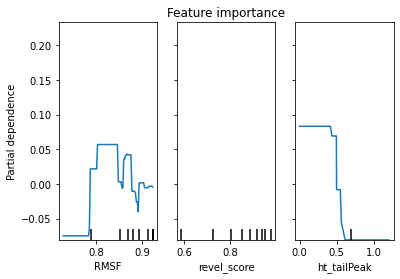

ValueError: All entries of features must be less than len(feature_names) = 6, got 6.

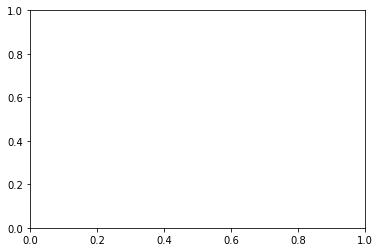

In [17]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[0, 1, 2], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[3, 4, 6], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
features = ['RMSF', 'lqt2_dist_max', 'revel_score']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

y = np.ravel(y)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[0, 1, 2], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
features = ['lqt2_dist_sequence', 
            'lqt2_dist_observed', 'lqt2_dist_mean',
           'lqt2_dist_obs_max', 'lqt2_dist_obs_mean', 'lqt2_dist_obs_seq',
           'lqt2_dist']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

y = np.ravel(y)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[0, 1, 2], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[3, 4, 5], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[6], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
features = ['revel_score','ht_tailPeak','hm_tailPeak',
            'lqt2_dist','RMSF', 'lqt2_dist_max', 'lqt2_dist_weight']


X = pd.DataFrame(df[features])
y = pd.DataFrame(df['penetrance_lqt2'])

y = np.ravel(y)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the HistGradientBoostingRegressor model
reg = HistGradientBoostingRegressor(max_iter=100, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[0, 1, 2], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[3, 4, 5], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

fig, ax = plt.subplots()
plot_partial_dependence(reg, X_train, features=[6], ax=ax)
ax.set_xlabel("Feature values")
ax.set_ylabel("Partial dependence")
ax.set_title("Feature importance")
plt.show()

# evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Explained variance score: {:.2f}".format(evs))